In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("../data/underlying_assets.xlsx", engine="openpyxl")
df.head()

,Name,Date,Close
0,삼성전자,2016-06-01,26660
1,삼성전자,2016-06-02,27300
2,삼성전자,2016-06-03,27540
3,삼성전자,2016-06-07,27960
4,삼성전자,2016-06-08,28120


<AxesSubplot:title={'center':'Histogram of the profit rate'}>

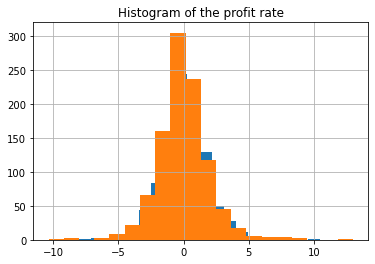

In [16]:
samsung = df[df.Name == "삼성전자"].set_index("Date").loc[:, "Close"].pct_change() * 100
hyundai = df[df.Name == "현대차"].set_index("Date").loc[:, "Close"].pct_change() * 100

plt.title("Histogram of the profit rate")
samsung.hist(bins=20)
hyundai.hist(bins=20)

In [20]:
s_ewma_vol = samsung[:"2017-06-29"].ewm(com=0.94).mean().mean()
h_ewma_vol = hyundai[:"2017-06-29"].ewm(com=0.94).mean().mean()
vol_corr = np.corrcoef(samsung[:"2017-06-29"].ewm(com=0.94).mean()[1:], hyundai[:"2017-06-29"].ewm(com=0.94).mean()[1:])[0, 1]

print(f"vol of samsung: {s_ewma_vol}\nvol of hyundai: {h_ewma_vol}\ncorrelation of vol: {vol_corr}")

vol of samsung: 0.2407045118308084
vol of hyundai: 0.07346699863390292
correlation of vol: -0.013606477981877065
